In [88]:
# dependencies
import tweepy
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



In [21]:
#Twitter API Keys
from TwitterConfig import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


#Setup Tweepy API Authentication

auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [60]:
#news outlets
NewsSource = ["@BBC","@CNN","@CBSNews","@nytimes","@FoxNews"]

In [79]:
#pulling last 100 tweets from each organization and append to DataFrame

ID=[]
date=[]
text=[]
compound=[]
pos=[]
neu=[]
neg=[]
tweets_ago=[]

#loop through news sources
for Source in NewsSource:
    #loop through 5 pages of tweets (total 100 tweets)
    y=0
    for x in range(5):
        #get all tweets
        public_tweets=api.user_timeline(Source,page=x)
        print(f"Successfully pulled data for {Source}")
        #loop through each of the last 100 tweets
        for tweet in public_tweets:
            #append information into lists
            ID.append(Source)
            temp_date=tweet["created_at"]
            temp_date=datetime.strptime(temp_date,"%a %b %d %H:%M:%S %z %Y")
            date.append(temp_date)
            temp_text=tweet["text"]
            text.append(tweet["text"])
            results=analyzer.polarity_scores(temp_text)
            compound.append(results["compound"])
            pos.append(results["pos"])
            neu.append(results["neu"])
            neg.append(results["neg"])
            tweets_ago.append(y)
            y=y+1
            

            

            
                    

Successfully pulled data for @BBC
Successfully pulled data for @BBC
Successfully pulled data for @BBC
Successfully pulled data for @BBC
Successfully pulled data for @BBC
Successfully pulled data for @CNN
Successfully pulled data for @CNN
Successfully pulled data for @CNN
Successfully pulled data for @CNN
Successfully pulled data for @CNN
Successfully pulled data for @CBSNews
Successfully pulled data for @CBSNews
Successfully pulled data for @CBSNews
Successfully pulled data for @CBSNews
Successfully pulled data for @CBSNews
Successfully pulled data for @nytimes
Successfully pulled data for @nytimes
Successfully pulled data for @nytimes
Successfully pulled data for @nytimes
Successfully pulled data for @nytimes
Successfully pulled data for @FoxNews
Successfully pulled data for @FoxNews
Successfully pulled data for @FoxNews
Successfully pulled data for @FoxNews
Successfully pulled data for @FoxNews


In [80]:
#Create DataFrame
Sentiment_Data=pd.DataFrame({"News Source":ID,"Tweets Ago":tweets_ago, "Tweet":text,
                             "Tweet Date":date,"Compound List":compound,
                             "Positive List":pos,"Negative List":neg,
                            "Neutral List": neu})

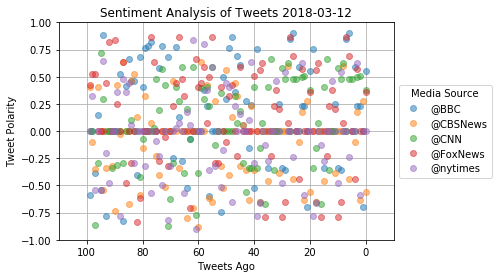

In [158]:
#create scatter plot
groups=Sentiment_Data.groupby("News Source")
fig, ax=plt.subplots()
ax.set_ylim(-1,1)
ax.set_xlim(110,-10)
ax.grid()
for name,group in groups:
    ax.plot(group["Tweets Ago"],group["Compound List"],alpha=0.5,marker="o",linestyle='',label=name)

ax.legend(loc='center left',bbox_to_anchor=(1,0.5),title="Media Source")    
today=datetime.today()
today=today.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets {today}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()

In [147]:
#group by News Source
News_Data=Sentiment_Data.groupby("News Source").mean()
News_Data

,Compound List,Negative List,Neutral List,Positive List,Tweets Ago
News Source,,,,,
@BBC,0.124133,0.06097,0.82998,0.10909,49.5
@CBSNews,-0.093463,0.08127,0.87408,0.04463,49.5
@CNN,0.076762,0.06010,0.85757,0.08236,49.5
@FoxNews,0.128850,0.05817,0.83971,0.10211,49.5
@nytimes,-0.049316,0.07486,0.86366,0.06147,49.5


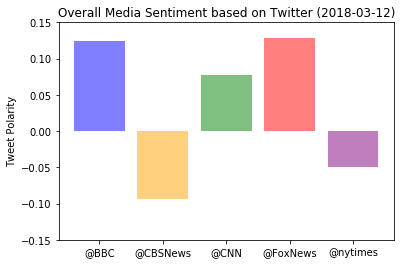

In [191]:
#Create bar chart
colors=["blue","orange","green","red","purple"]
fig, ax=plt.subplots()
rectangul=ax.bar(News_Data.index,News_Data["Compound List"],color=colors,alpha=0.5,align = "center")
ax.set_ylim(-.15,.15)
plt.title(f"Overall Media Sentiment based on Twitter ({today})")  
plt.ylabel("Tweet Polarity")
plt.show()

#Observable Trends

The data shows the following:
    1. on average media outlets try to be neutral in the wording of their tweets
    2. BBC and FoxNews tend to show the most positive news
    3. CBS and NYT tend to be more negative
